# 다항 회귀(Polynormial Regression)

## 다항 회귀 개요
- 회귀식이 독립변수의 단항식이 아닌 N차 방정식과 같은 형태로 표현되는 것
  - ex. $y = w_0 + w_1 x_1 + w_2 x_2 + w_3 x_1 x_2 + w_4 x_1^2 + w_5 x_2^2$
- 데이터 세트에 대해서 피처에 대해 타겟 값의 관계를 단순 선형 회귀 직선으로 표현하는 것 보다 다항 회귀 곡선으로 표현하는 것이 더 예측 성능이 높다.
  - 단항식으로 회귀식을 표현하는 경우 데이터의 큰 추세정도만 반영할 수 있고 데이터의 특징을 잘 담아내기 어렵기 때문에 과소적합 상태일 확률이 높다.
  - 다항식으로 회귀식을 표현하는 경우 일반화된 모델에 더 가까워질 수 있다.

## 선형 회귀와 비선형 회귀
- 회귀에서 선형 회귀와 비선형 회귀를 나누는 기준은 회귀 계수가 선형/비선형인지 여부로 결정된다.
- 즉, 독립 변수 $x$, 즉 피쳐가 여러개이기 때문에 비선형인 다항회귀는 곡선으로 표현되는 선형 회귀이다.

## 사이킷런에서의 다항회귀
- 사이킷런에서는 다항회귀 API가 존재하지 않기 때문에 `PolynomialFeatures` 클래스를 이용해 원본 단항 피처를 단항 피처로 변환해 `LinearRegression`을 적용시켜야 한다.
- 단항 피처 $[x_1, x_2]$의 차수(degree)를 2차 다항 피처로 변환시키면 $(x_t + x_2)^2$의 전개에 대응되는 $[1, x_1, x_2, x_1 x_2, x_1^2, x_2^2]$의 다항 피처로 변환된다.
- 변환된 다항식의 데이터가 선형 종속인 것은 상관없으나, 변형전 단항식이 선형 종속일 경우 과적합이 될 수 도 있다.

## 다항 회귀 실습

### 다항회귀의 효과 확인

In [1]:
# 일차 단항식 Feature 샘플 생성
import numpy as np

sample = np.arange(6).reshape(3,2)
sample

array([[0, 1],
       [2, 3],
       [4, 5]])

In [2]:
## PolynomialFeatures로 단항식을 n차 다항식으로 만들어 준다.
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2) # degree(차수) 옵션을 이용해 2차 다항식으로 만들도록 설정

poly.fit(sample)

# 이차 다항식 Feature
poly_ftr = poly.transform(sample)
poly_ftr

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

- 제일 앞에 붙은 `1`은 bias 편향 편차. 없어도 상관없는 값이다.

### 보스턴 주택 가격 데이터에 다항 회귀를 활용

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')  # 사이킷런 1.2 부터는 보스턴 주택가격 데이터가 없어진다는 warning 메시지 출력 제거

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

boston_df = pd.DataFrame(
    data=data,
    columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
)

boston_df['PRICE']=target
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [4]:
## 데이터 분할
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(
    boston_df.drop('PRICE', axis=1),
    boston_df['PRICE'],
    test_size=0.2,
    random_state=42
)

#### 1. 2차식으로 만드는 경우

In [5]:
boston_poly = PolynomialFeatures(degree=2, include_bias=False)

# 훈련 세트를 다차식으로 학습 및 변환
X_poly_2 = boston_poly.fit_transform(X_train)

X_poly_2.shape, X_train.shape

((404, 104), (404, 13))

- `include_bias=False` : bias 안보이게 하는 옵션

In [6]:
## 테스트 세트 다차식으로 학습 및 변환
X_poly_test_2 = boston_poly.fit_transform(X_test)

X_poly_test_2.shape, X_test.shape

((102, 104), (102, 13))

- 훈련 세트를 다차식으로 만들었으면, 테스트 세트도 다차식으로 변환해야 한다.
- 테스트 데이터를 변환(transform)할 때는 반드시 훈련 데이터의 Transformer(변환기)를 사용해야 한다.
  - 절대로 테스트 세트를 위한 Transformer를 새롭게 만들지 않는다.
  - 따로 변환기를 만들 경우 데이터의 Standard Scaling, Min-Max Scaling에서 사용되는 평균, 표준편차, 최소값, 최대값이 달라진다.

In [7]:
## 다차항이 추가된 Feature로 선형 회귀 모델 객체 생성 및 훈련
lr_reg_poly = LinearRegression()
lr_reg_poly.fit(X_poly_2, y_train) # 다차항으로 변환한 피처 데이터 넣기

## 모델 예측
# 다차항으로 변환된 테스트 세트로 예측
y_poly_test_pred = lr_reg_poly.predict(X_poly_test_2)

In [8]:
from sklearn.metrics import mean_squared_error, r2_score

test_poly_mse = mean_squared_error(y_test, y_poly_test_pred )
test_poly_rmse = np.sqrt(test_poly_mse)
test_poly_r2 = r2_score(y_test, y_poly_test_pred )

print(f'MSE : {test_poly_mse}')
print(f'RMSE : {test_poly_rmse}')
print(f'R2 : {test_poly_r2}')

MSE : 14.257338167714071
RMSE : 3.7758890565950254
R2 : 0.8055829448135172


In [9]:
## 다차항과 비교하기 위해 단항식 선형회귀 모델 훈련 및 예측
lr_reg = LinearRegression().fit(X_train, y_train) # 단항식 피처 데이터 - 비교용
y_test_pred = lr_reg.predict(X_test)

test_mse = mean_squared_error(y_test, y_test_pred )
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred )

print(f'MSE : {test_mse}')
print(f'RMSE : {test_rmse}')
print(f'R2 : {test_r2}')

MSE : 24.291119474973478
RMSE : 4.928602182665332
R2 : 0.6687594935356326


- 단항식으로 선형회귀 모델에 활용한 경우보다 다항식으로 변환하여 선형회귀 모델에 활용한 경우 R2가 높아지는 것으로 보아 훨씬 성능 개선이 이루어진 것을 확인할 수 있다.

#### 2. 3차식으로 만드는 경우

In [10]:
boston_poly_3 = PolynomialFeatures(degree=3, include_bias=False)
X_poly_3 = boston_poly_3.fit_transform(X_train)
X_poly_3.shape, X_train.shape

((404, 559), (404, 13))

- 3차 다항식으로 변환시 행보다 열이 많게 되어 해가 무수히 많이 나오게 된다.
  - 예측 성능이 너무 좋아질 것이다.

In [11]:
X_poly_test_3 = boston_poly_3.fit_transform(X_test)

lr_reg_poly_3 = LinearRegression()
lr_reg_poly_3.fit(X_poly_3, y_train)

y_poly_3_test_pred = lr_reg_poly_3.predict(X_poly_test_3)

test_poly_3_mse = mean_squared_error(y_test, y_poly_3_test_pred)
test_poly_3_rmse = np.sqrt(test_poly_3_mse)
test_poly_3_r2 = r2_score(y_test, y_poly_3_test_pred)

print(f'MSE : {test_poly_3_mse}')
print(f'RMSE : {test_poly_3_rmse}')
print(f'R2 : {test_poly_3_r2}')

MSE : 129847.994736781
RMSE : 360.3442725183529
R2 : -1769.64361254766


In [12]:
y_train_pred = lr_reg_poly_3.predict(X_poly_3)

train_poly_3_mse = mean_squared_error(y_train, y_train_pred)
train_poly_3_rmse = np.sqrt(train_poly_3_mse)
train_poly_3_r2 = r2_score(y_train, y_train_pred)

print(f'MSE : {train_poly_3_mse}')
print(f'RMSE : {train_poly_3_rmse}')
print(f'R2 : {train_poly_3_r2}')

MSE : 1.9922802853279247e-13
RMSE : 4.4634967069864907e-07
R2 : 0.9999999999999977


- 테스트 세트에 대한 MSE, RMSE가 엄청 커지게 된다.
- 훈련 세트에 대한 MSE, RMSE는 거의 0이 된다.
$→$ 과대적합 상태
- 따라서 2차 다항식으로 변환후 선형회귀 모델에 적용하는 것이 적절한 것으로 보인다.


### `StandardScaling`과 선형 회귀의 관계
- 데이터 전처리에서 표준화 과정이 선형 회귀 모델에 있어 얼마나 중요한 역할을 하는지 확인
- 피처 데이터를 다차식으로 변환하지 않고 표준화만 수행 후 선형 회귀 모델의 성능을 평가해보겠다.

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
## 피처 훈련 데이터에 대한 표준화 수행
X_train_scaled = scaler.fit_transform(X_train)

## 피처 테스트 데이터에 대한 표준화 수행
# 훈련 세트에 의해 계산된 평균과 표준편차 그대로 사용하여 테스트 데이터 세트 표준화 수행
# 훈련 세트와 테스트 세트의 평균과 표준 편차의 기준이 달라지게 되므로 테스트 데이터 세트는 fit() 하면 안됨
X_test_scaled = scaler.transform(X_test)

In [14]:
lr_reg_scaled = LinearRegression()
lr_reg_scaled.fit(X_train_scaled, y_train)

y_pred = lr_reg_scaled.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MSE : {mse}')
print(f'RMSE : {rmse}')
print(f'R2 : {r2}')

MSE : 24.291119474973513
RMSE : 4.928602182665336
R2 : 0.668759493535632


- 보통의 경우 피처 데이터에 대해 Standard Scaling 진행 후 모델에 적용하면 모델의 성능이 더 좋아질 확률이 높다.
- 하지만 보스턴 주택 가격에 대한 데이터는 피처 데이터 표준화로 모델의 성능이 눈에 띄게 좋아지지 않았다.
  - 이 경우는 예측을 하기 위한 피처 데이터의 개수가 부족한 상태일 수 있다.
- 보스턴 주택 가격 데이터 세트는 피처 데이터 표준화보다 다차식으로 변환하는 것이 더 유리하다고 볼 수 있겠다.

## 다항 회귀를 이용한 과대적합, 과소적합
- 단항식을 다항식으로 변환하면 차수가 증가하면서 데이터가 복잡해진다.

### 편향(Bias)
- **훈련 데이터에 대한 방향성**
- 모델의 예측이 정확하게 방향성을 잘 잡고 가고 있는가를 의미
- 훈련 데이터의 추세를 얼마만큼 반영하고 있는지를 나타낸다.
- 훈련 데이터와 모델 예측의 차이, **에러(Loss)**를 의미

### 분산(Variance)
- 테스트 데이터를 예측할 때 마다 초점에서 얼마만큼 벗어나는가를 의미
- 훈련 데이터의 학습 복잡도를 의미
- 모델의 변동성, 예측 가능 범위를 나타낸다.
- 훈련 데이터 예측에 의한 분산이 커지면, 테스트 데이터 세트에 대한 예측이 잘 되지 않는다.


### 편향-분산 트레이드 오프(Bias-Virance Trade off)
- 편향과 분산은 상호 보완적
- 일반적으로 편향이 높으면 분산은 낮아지고, 편향이 낮아지면 분산은 높아진다.

#### 1. 일반화(Low Bias, Low Variance)
- **편향이 낮고, 분산이 낮다.**
- 훈련 데이터의 방향성과 예측하고자 하는 초점이 정확하게 맞는다.

#### 2. 과대적합(Low Bias, High Variance)
- **편향이 낮다.** 훈련 데이터의 방향성을 잘 잡고 있는 상태이고 에러가 작다.
- **분산이 높다.**  가중치가 크고 모델의 변동성/복잡도가 높다.
- 모델이 훈련 데이터를 과하게 해석한 상태이다.
- 단순한 문제를 고차원적으로 풀기 때문에, 훈련 데이터에 대한 예측 성능은 좋을 수도 있지만 테스트 데이터에 대한 예측이 산만하게 분산되어 **모델의 예측 성능은 매우 떨어질 수 있다.**
- 머신러닝 모델을 만들었을 때 많이 만나볼 수 있는 상황

#### 3. 과소적합(High Bias, High Variance)
- **편향이 높다.** 훈련 데이터의 방향성이 맞지 않는 상태이고 에러가 크다.
- **분산이 높다.**  가중치가 크고 모델의 변동성/복잡도가 높다.
- **모델이 훈련 데이터를 잘 파악하지 못하고 있는 상태**로 볼 수 있다.
- Feature에 대한 문제를 굉장히 단순히 보기 때문에, 약간만 문제가 복잡해져도 해결하지 못한다.
  - 이 경우 최소한 데이터 표본(행)이 많아야 한다.


#### 4. High Bias, Low Variance
- 편향이 높고 분산이 낮은 상태는 예측 방향이 잘못되었으나, 테스트 할 때마다 비슷하게 값이 모여 있는 경우이다.
- 예측 전 세팅이 잘못되어 있는 경우로, **하이퍼 파라미터 지정이 잘못된 상태이기 때문에 조정해주는 작업이 필요**하다.


## 과소적합과 과대적합 실습

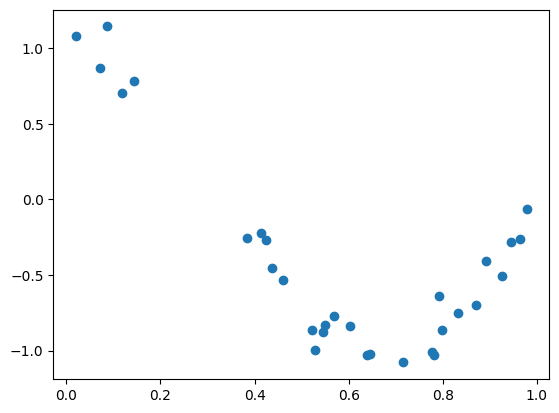

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# random 값으로 구성된 X값에 대해 Cosine 변환값을 반환
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# X는 0 부터 1까지 30개의 random 값을 순서대로 sampling 한 데이터
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y 값은 cosine 기반의 true_fun() 에서 약간의 Noise 변동값을 더한 값
y = true_fun(X) + np.random.randn(n_samples) * 0.1
plt.scatter(X, y)


Degree 1 회귀 계수는 [-1.61] 입니다.
Degree 1 MSE 는 0.41 입니다.

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 입니다.
Degree 4 MSE 는 0.04 입니다.

Degree 15 회귀 계수는 [-2.98293000e+03  1.03899390e+05 -1.87416123e+06  2.03716219e+07
 -1.44873283e+08  7.09315363e+08 -2.47065792e+09  6.24561050e+09
 -1.15676510e+10  1.56894936e+10 -1.54006023e+10  1.06457264e+10
 -4.91377530e+09  1.35919645e+09 -1.70380786e+08] 입니다.
Degree 15 MSE 는 181238256.56 입니다.


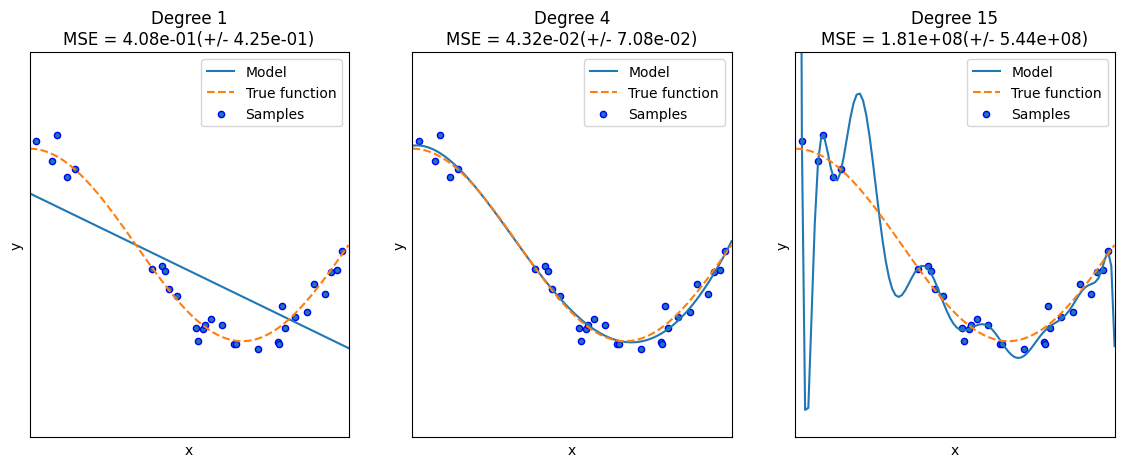

In [16]:
plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교합니다.
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    # 개별 degree별로 Polynomial 변환합니다.
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)

    # 교차 검증으로 다항 회귀를 평가합니다.
    scores = cross_val_score(pipeline, X.reshape(-1,1), y,scoring="neg_mean_squared_error", cv=10)
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients, 2)))
    print('Degree {0} MSE 는 {1:.2f} 입니다.'.format(degrees[i] , -1*np.mean(scores)))

    # 0 부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다.
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다.
    X_test = np.linspace(0, 1, 100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    # 실제 값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")

    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))

plt.show()

* Degree 1의 경우
  - 회귀 계수, 즉 가중치가 `-1.61`인 것은, 좌하향 방향성을 가지고 있는 것을 확인할 수 있다.
  - `MSE=0.41`를 보아 에러는 적당하게 높은 편인 것 같음
    - MSE는 검증 데이터 세트에 대한 오차로, 학습하지 않은 새로운 데이터에 대한 오차라고 볼 수 있다.
  - 훈련 데이터 세트에 대한 예측 오차도 클 것으로 예상된다.

* Degree 4의 경우
  - Degree 1보다 가중치의 값들이 크다는 것을 확인할 수 있다.
  - Degree 1보다 MSE, 즉 오차가 훨씬 더 작아진 것을 확인할 수 있다.

* Degree 15의 경우
  - Degree 4보다 가중치의 값들이 매우 커진 것을 확인할 수 있다. 가중치의 값이 커지면 모델의 변동성(분산)이 커질 수 있다.
  - 선형 회귀 모델에서 과대 적합이 의심될 경우, 먼저 각 가중치의 값을 확인해보는 것도 좋은 방법이다.(가중치의 개수는 상관없음)
  - 때문에 `MSE=181238256.56`가 아주 크게 나온 것을 확인할 수 있다.
  - 테스트 데이터 세트에 대한 예측 오차는 매우 크지만, 훈련 데이터 세트에 대한 예측 오차는 아주 작을 것으로 예상된다.

- 데이터가 많아지면 가중치가 낮아지는 것이 일반적이다.
- 보통 딥러닝 가중치의 일반값은 0에서 1사이의 값이다.
- 가중치가 커지면 분산이 커져 모델이 데이터를 복잡하게 해석하여 과대적합 상태일 확률이 높다. 이러한 상황을 피하기 위해서 가중치가 일정 기준 이상 커지지 않게 하는 **가중치 규제 필요**하다.

## 규제 선형 회귀(Regularized Linear Regression)

### 회귀 계수 크기 제어의 필요성
- 위 실습에서 확인한 Degree=15인 다항회귀 처럼 지나치게 모든 데이터에 적합한 회귀식을 만들기 위해 다항식이 복잡해지고 회귀 계수가 매우 크게 설정되어 과대적합이 되었고, 테스트 데이터 세트에 대해 좋지 않는 성능을 보였다.

- 회귀 모델은 적절히 데이터에 적합하면서도 **회귀 계수가 기하급수적으로 커지는 것을 제어**할 수 있어야 한다.

- 즉, **최적의 모델이 되기 위한 손실 함수의 학습 목표**는 **학습 데이터에 대한 잔차 오류도 최소화** 되어야 하지만, **회귀 계수의 크기 제어**도 함께 포함된다.


### 선형대수학 관점의 최적의 회귀 계수
선형대수학 관점에서 손실함수($RSS$)를 최적화/최소화 할 수 있는 가중치($w$)를 구해야 한다.

#### 1. L2 방식

$$
Loss(x,y) = \arg\min_w \sum(y- \hat y) + α\sum w^2 =  \arg\min_w \sum RSS(W) + α\sum w^2
$$

#### 2. L1 방식

$$
Loss(x,y) = \arg\min_w \sum(y- \hat y) + α\sum |w| =  \arg\min_w \sum RSS(W) + α\sum |w|
$$

### 규제 선형 모델의 $\alpha$의 역할
- 가중치($w$)에 대한 규제 계수

* $\alpha=0$ 또는 0에 가까운 매우 작은 값일 경우
  - 손실함수의 식은 기존과 동일
  - $Loss(x,y) = \arg\min_w \sum RSS(W) +0$
  - 즉, 가중치가 얼마나 커지든 상관하지 않는 상태로 가중치에 대한 규제가 없는 상태

* $\alpha=∞$ 또는 무한대에 가까운 매우 큰 값일 경우
  - 손실 함수 식은 $RSS(W)$에 비해 $α\sum w^2$ 또는 $α\sum |w|$의 값이 무한대에 가깝게 커진다.
  - W를 작게 만들어야 손실이 최소화되는 손실 함수 목표를 달성할 수 있다.
  - $\alpha$의 영향으로 $Loss$가 무한대로 커지기 때문에 $Loss$를 최소화하기 위해 $W$가 0에 가깝게 최소화 해야 한다.

- 즉, $\alpha$값을 적절히 조절해 최적의 손실함수를 구할 수 있다.
  - $\alpha$값을 크게 하면 손실 함수는 회귀 계수($W$)의 값을 작게 해 과적합을 개선 가능
  - $\alpha$값을 작게 하면 회귀 계수($W$)의 값이 커져도 어느 정도 상쇄가 가능하므로 학습 데이터 적합을 더 개선할 수 있다.

- 이처럼 **손실 함수에 $\alpha$값으로 패널티를 부여**해 회귀 계수 값의 크기를 감소시켜 과적합을 개선하는 방식을 **규제(Regularization)**라고 한다.

## 규제 선형 회귀의 유형
- 규제는 크게 L2 방식과 L1 방식으로 구분
- 규제 방식에 따라 규제 선형 회귀는 릿지 회귀, 라쏘 회귀, 엘라스틱 넷으로 구분된다.





### 1. 릿지(Ridge) 회귀
- **L2 방식**을 적용한 회귀
- **회귀 계수 값을 무한히 0에 가깝게 만들지만 0이 되지는 않는다.**
- $\alpha$ 값을 이용하여 회귀 계수의 크기를 조절한다.
  - $\alpha$값이 크면 회귀 계수의 값이 작아진다.
  - $\alpha$값이 작아지면 회귀 계수의 값이 커진다.

### 2. 라쏘(Lasso) 회귀
- L1 방식을 적용한 회귀
- **영향력이 크지 않은 회귀 계수 값을 0으로 반환**
- 영향력이 크지 않은 회귀 계수에 대한 피처 데이터가 사용되지 않는다.
- 서로 상관관계가 높은 피처들의 경우에 이들 중 중요 피처만 선택하고, 다른 피처들은 모두 회귀 계수를 0으로 만드는 성향이 강하다.
- 이를 **Feature Selection(특성 선택)** 이라고도 한다.
- 피처 데이터를 제거하는 방식으로 Risk가 크기 때문에 Lasso 회귀 보다는 Ridge 회귀가 더 많이 사용된다.

### 3. 엘라스틱 넷(ElasticNet)
- L2, L1 방식을 결합한 모델

$$
Loss(x,y) = \arg\min_w \sum RSS(W) + α\sum w^2 + α\sum |w|
$$

- 위 손실함수 식을 최소화하는 $W$를 찾는 것

- 주로 Feature가 많은 데이터 세트에 적용된다.
- L1 규제로 Feature의 개수를 줄임과 동시에, L2 규제로 계수 값의 크기를 조정한다.
- L1 방식을 사용하는 라쏘 회귀가 서로 상관관계가 높은 피처들의 경우에 이들 중 중요 피처만 선택하고, 다른 피처들은 모두 회귀 계수를 0으로 만드는 성향이 강하기 때문에, $\alpha$값에 의해 회귀 계수의 값이 급격히 변동하는 것을 완화해주기 위해 L2 규제를 추가해준 것

#### `ElasticNet` 클래스의 주요 하이퍼 파라미터
- `alpha` : L1, L2 규제에 사용될 $\alpha$의 합
  - $\sum RSS(W) + α_2 \sum w^2 + α_1 \sum |w|$ 에서 $\alpha=α_2 + α_1$
- `l1_ratio` : L1 규제에 사용할 $\alpha$의 비율
  - $\sum RSS(W) + α_2 \sum w^2 + α_1 \sum |w|$ 에서 $\frac{α_1}{α_2 + α_1}$
  - `l1_ratio=0` : $\alpha_1=0$이 되면서 L2 규제와 동일해진다.
  - `l1_ratio=1` : $\alpha_2=0$이 되면서 L1 규제와 동일해진다.
  - `l1_ratio`가 0과 1사이의 값이면 L1과 L2 규제를 적절히 잘 적용한다.
- 예를 들어 `alpha=10`, `l1_ratio=0.7`이면 $\alpha_1 = 10 \times 0.7 = 7$, $\alpha_2 = 10 \times (1 - 0.7) = 3$이 된다.

## 규제 선형 회귀 실습

### 1. degree=15로 다항식 변환 & Ridge 회귀 모델 사용

alpha 10 : [-0.28 -0.18 -0.1  -0.05 -0.01  0.01  0.02  0.03  0.04  0.04  0.05  0.05
  0.05  0.05  0.05] 입니다.
alpha 10 MSE 는 0.48 입니다.

alpha 1 : [-1.26 -0.66 -0.24 -0.    0.12  0.19  0.21  0.22  0.21  0.2   0.19  0.18
  0.16  0.15  0.14] 입니다.
alpha 1 MSE 는 0.22 입니다.

alpha 0.1 : [-2.8  -0.98  0.11  0.58  0.71  0.67  0.56  0.42  0.29  0.16  0.05 -0.05
 -0.13 -0.2  -0.25] 입니다.
alpha 0.1 MSE 는 0.06 입니다.

alpha 0.01 : [-3.43 -1.29  0.39  1.09  1.2   1.01  0.71  0.41  0.15 -0.05 -0.2  -0.29
 -0.34 -0.35 -0.33] 입니다.
alpha 0.01 MSE 는 0.02 입니다.



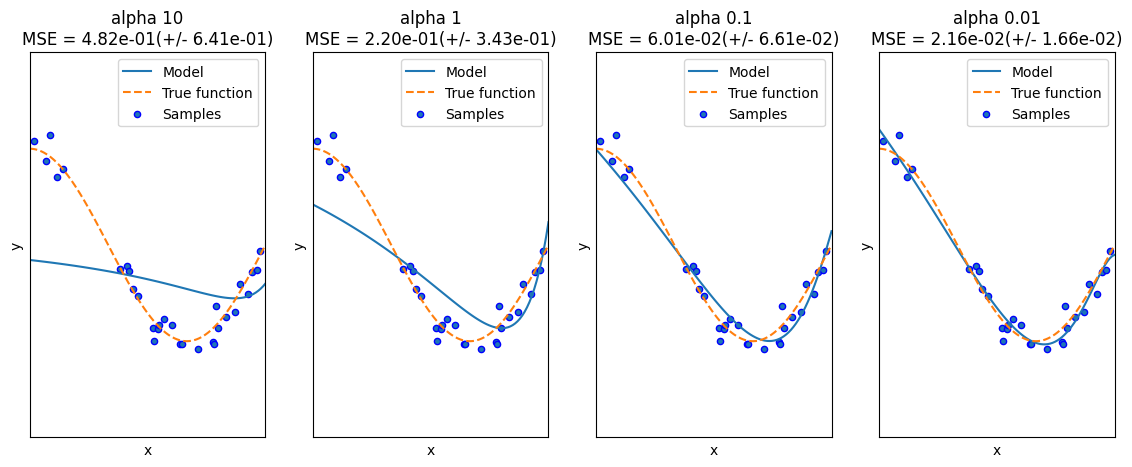

In [35]:
from sklearn.linear_model import Ridge

plt.figure(figsize=(14, 5))
alphas = [10, 1, 0.1, 0.01]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교합니다.
for i in range(len(alphas)):
    ax = plt.subplot(1, len(alphas), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    # 개별 degree별로 Polynomial 변환합니다.
    polynomial_features = PolynomialFeatures(degree=15, include_bias=False)
    ridge = Ridge(alpha=alphas[i])
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", ridge)])
    pipeline.fit(X.reshape(-1, 1), y)

    # 교차 검증으로 다항 회귀를 평가합니다.
    scores = cross_val_score(pipeline, X.reshape(-1,1), y,scoring="neg_mean_squared_error", cv=10)
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('alpha {0} : {1} 입니다.'.format(alphas[i], np.round(coefficients, 2)))
    print('alpha {0} MSE 는 {1:.2f} 입니다.'.format(alphas[i], -1*np.mean(scores)))
    print()

    # 0 부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다.
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다.
    X_test = np.linspace(0, 1, 100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    # 실제 값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")

    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc="best")
    plt.title("alpha {}\nMSE = {:.2e}(+/- {:.2e})".format(alphas[i], -scores.mean(), scores.std()))

plt.show()

- alpha가 커질 수록 회귀계수($W$)가 작아지고, alpha가 작아질 수록 회귀계수($W$)가 커지는 것을 확인할 수 있다.

* `alpha=10`
  - `degree=15`인 선형 회귀 모델보다 릿지 회귀 모델의 회귀계수($W$)들의 값이 확연하게 낮아진 것을 확인할 수 있다.
  - 하지만 `degree=1`인 선형 회귀 모델 만큼 너무 단순하게 데이터를 예측하고 있는 것을 확인할 수 있다.



alpha 0 : [-2.98293000e+03  1.03899390e+05 -1.87416123e+06  2.03716219e+07
 -1.44873283e+08  7.09315363e+08 -2.47065792e+09  6.24561050e+09
 -1.15676510e+10  1.56894936e+10 -1.54006023e+10  1.06457264e+10
 -4.91377530e+09  1.35919645e+09 -1.70380786e+08] 입니다.
alpha 0 MSE 는 181238256.78 입니다.


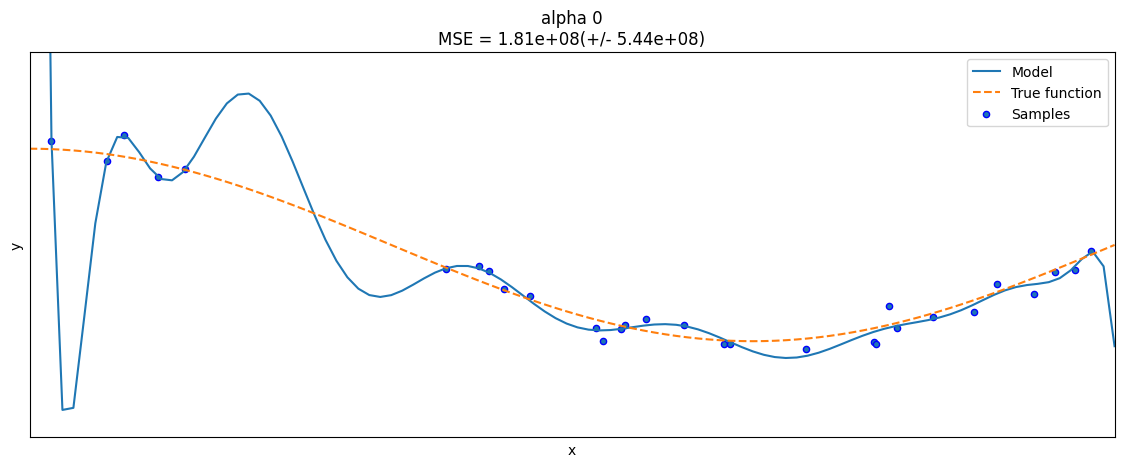

In [18]:
from sklearn.linear_model import Ridge

plt.figure(figsize=(14, 5))
alphas = [0]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교합니다.
for i in range(len(alphas)):
    ax = plt.subplot(1, len(alphas), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    # 개별 degree별로 Polynomial 변환합니다.
    polynomial_features = PolynomialFeatures(degree=15, include_bias=False)
    ridge = Ridge(alpha=alphas[i])
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", ridge)])
    pipeline.fit(X.reshape(-1, 1), y)

    # 교차 검증으로 다항 회귀를 평가합니다.
    scores = cross_val_score(pipeline, X.reshape(-1,1), y,scoring="neg_mean_squared_error", cv=10)
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('alpha {0} : {1} 입니다.'.format(alphas[i], np.round(coefficients, 2)))
    print('alpha {0} MSE 는 {1:.2f} 입니다.'.format(alphas[i], -1*np.mean(scores)))

    # 0 부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다.
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다.
    X_test = np.linspace(0, 1, 100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    # 실제 값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")

    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc="best")
    plt.title("alpha {}\nMSE = {:.2e}(+/- {:.2e})".format(alphas[i], -scores.mean(), scores.std()))

plt.show()

- `alpha=0`
  - 릿지 회귀 모델이 선형 회귀 모델과 회귀계수와 MSE 일치하는 동일한 모델이 된 것을 확인할 수 있다.

## 규제 선형 회귀를 이용한 보스턴 주택 예측 실습
- 선형회귀에서 사용한 보스턴 주택 가격 예측 데이터를 이용해 비교
- `degree=3`인 다항식으로 변환후 규제 선혀 회귀 모델에 적용

In [36]:
## 보스턴 주택 가격 예측 데이터 세트 가져와 판다스 DataFrame으로 변환
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

boston_df = pd.DataFrame(
    data=data,
    columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
)

boston_df['PRICE']=target
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [37]:
## 데이터 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    boston_df.drop("PRICE", axis=1),
    boston_df['PRICE'],
    test_size=0.2,
    random_state=42
)

In [23]:
## 단항식을 degree=3인 다항식으로 변환
from sklearn.preprocessing import PolynomialFeatures

bostin_poly = PolynomialFeatures(degree=3, include_bias=False)

X_train_3 = bostin_poly.fit_transform(X_train)
X_test_3 = bostin_poly.transform(X_test)

In [24]:
X_train_3.shape, X_test_3.shape

((404, 559), (102, 559))

- 행보다 열이 많은 상태라서 약간 불안정한 모델이 나올 확률이 높을 것으로 예상된다.

In [38]:
## 편의를 위해 모델의 MSE 확인하는 함수 정의
from sklearn.metrics import mean_squared_error

def print_score(model, test_data, y_test):
  pred = model.predict(test_data)
  mse = mean_squared_error(y_test, pred)
  print("\nMSE : {:.3f}".format(mse))

### 1. `LinearRegression` 성능 확인
- `degree=3`

In [26]:
## LinearRegression 모델링
from sklearn.linear_model import LinearRegression

lr_reg = LinearRegression().fit(X_train_3, y_train)

## 훈련 세트와 테스트 세트에 대한 MSE 확인
print_score(lr_reg, X_train_3, y_train) # 훈련 세트에 대한 MSE
print_score(lr_reg, X_test_3, y_test) # 테스트 세트에 대한 MSE


MSE : 0.000

MSE : 129847.995


- `degree=3`인 다항식 데이터로 변환했을 때, `LinearRegression` 객체에 데이터를 학습 및 훈련했을 경우, 데이터가 너무 복잡해서 과대적합 된 것을 확인할 수 있다.

In [39]:
# coef_ 로 가중치 확인 가능
lr_reg.coef_

array([-7.51886506e-01, -3.80909396e+00, -1.06645442e+00, -2.14848458e-03,
       -4.77764291e-02, -4.12817415e-01,  5.19697092e+01, -2.49332378e+00,
        3.47515164e+00,  2.05253674e+01,  1.50290326e+00, -1.97278841e+01,
        3.23291414e-01, -1.15914767e+01, -1.06288961e+01,  1.85791929e+00,
       -9.34481016e-03,  1.87630138e+00,  5.97462993e+00, -7.09135741e+00,
       -9.83862902e+00,  5.61231782e+00,  3.02785956e+00, -8.27344044e+00,
       -1.83110683e+00, -2.02973592e+01, -1.57726454e+00, -1.37901955e+01,
       -2.45327477e-03, -7.90415760e+00,  9.33196579e+00, -1.15835208e+00,
        1.12385316e+01, -6.82716921e+00,  8.67243435e-01,  9.19531105e-02,
       -1.83479749e-01, -4.23331033e+00, -1.77800582e+01, -1.12536653e-02,
        1.31358386e+00, -3.64615246e+01, -1.42562721e+01,  7.57016398e+00,
       -9.52876608e+00,  5.62807062e+00, -1.27710321e+01, -1.46435984e+00,
        2.31063786e+01, -2.17709203e-03, -1.78582665e-04, -6.33504839e-03,
       -6.64131822e-02,  

### 2. Ridge를 이용한 규제 선형회귀
- `degree=3`
- `alpha=10` 가중치 규제

In [28]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=10).fit(X_train_3, y_train)

print_score(ridge_reg, X_train_3, y_train) # 훈련 세트에 대한 MSE
print_score(ridge_reg, X_test_3, y_test) # 테스트 세트에 대한 MSE


MSE : 3.316

MSE : 169.674


- `alpha=10`로 회귀계수(가중치) 규제를 한 `Ridge` 모델이 선형 회귀 모델 `LinearRegression` 보다 테스트 세트에 대한 MSE가 확연히 줄었고, 훈련 세트와 테스트 세트에 대한 MSE의 차이도 줄었다.

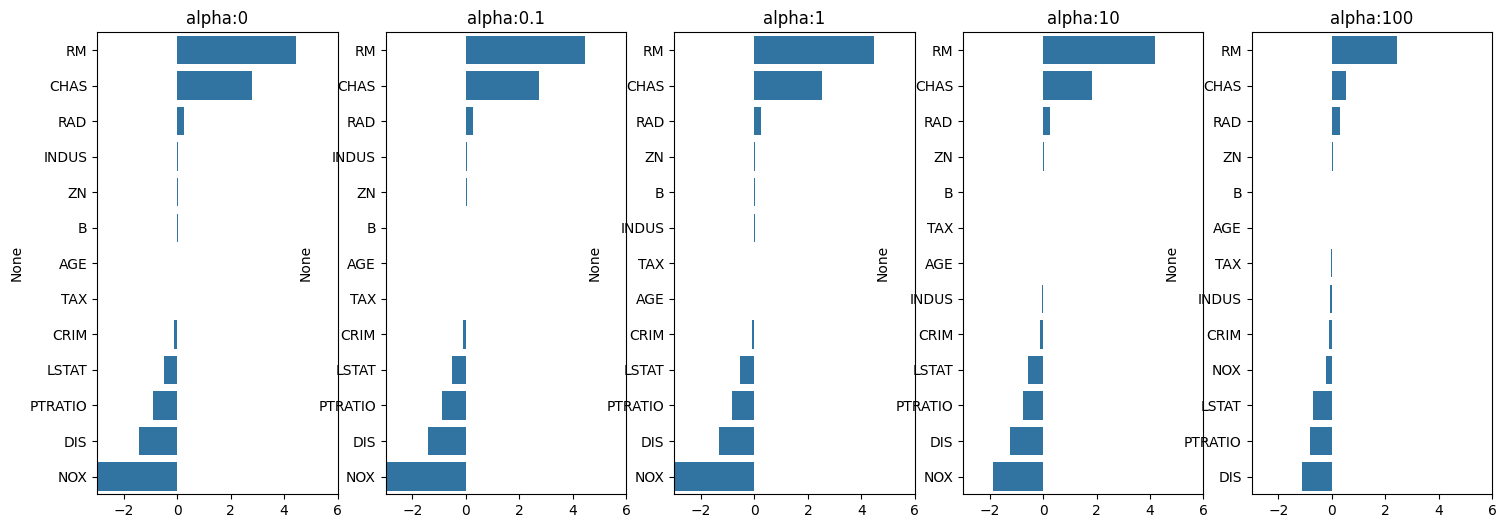

In [29]:
alphas = [0 , 0.1 , 1 , 10 , 100]

# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성
fig , axs = plt.subplots(figsize=(18,6) , nrows=1 , ncols=5)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos , alpha in enumerate(alphas) :
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_train , y_train)
    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.
    coeff = pd.Series(data=ridge.coef_ , index=X_train.columns )
    colname='alpha:'+str(alpha)
    coeff_df[colname] = coeff
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values , y=coeff.index, ax=axs[pos])

# for 문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()

- Ridge 회귀 모델의 경우 알파가 커질 수록 가중치(회귀 계수)가 점점 줄어드는 것을 확인할 수 있다.

### 3. Lasso를 이용한 규제 선형 회귀
- `degree=3`
- `alpha=10`

In [44]:
from sklearn.linear_model import Lasso

lr_ridge = Ridge(alpha=10).fit(X_train, y_train)

lr_lasso = Lasso(alpha=10).fit(X_train, y_train)

# Ridge, Lasso 가중치 확인
print('Ridge 가중치 : ', lr_ridge.coef_)
print()
print('Lasso 가중치 : ', lr_lasso.coef_)

Ridge 가중치 :  [-0.10713363  0.03555248 -0.02627747  1.81329133 -1.88924475  4.19532572
 -0.01534126 -1.23262135  0.24803063 -0.01274419 -0.76176896  0.01283334
 -0.561835  ]

Lasso 가중치 :  [-0.          0.00632092 -0.          0.          0.          0.
  0.         -0.          0.         -0.0090727  -0.          0.00989229
 -0.60414765]


- 똑같은 데이터를 학습한 Ridge와 Lasso를 비교해보면, Lasso에서는 불필요한 회귀 계수(가중치)를 0으로 만드는 것을 확인할 수 있다.

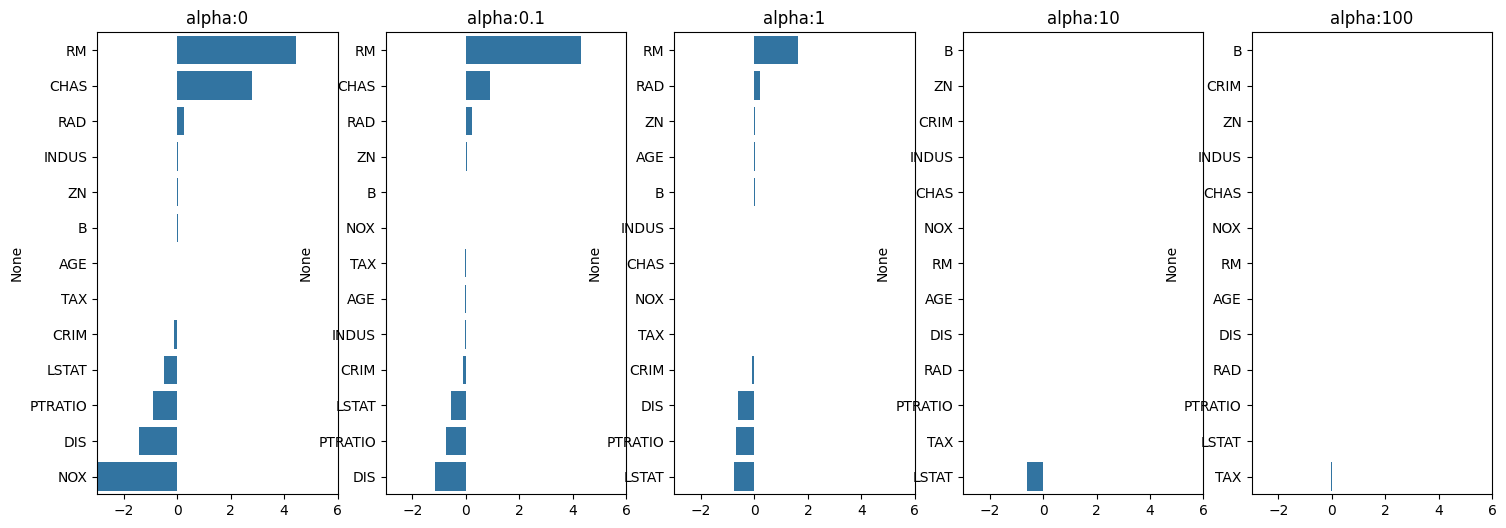

In [32]:
alphas = [0 , 0.1 , 1 , 10 , 100]

# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성
fig , axs = plt.subplots(figsize=(18,6) , nrows=1 , ncols=5)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos , alpha in enumerate(alphas) :
    lasso = Lasso(alpha = alpha)
    lasso.fit(X_train , y_train)
    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.
    coeff = pd.Series(data=lasso.coef_ , index=X_train.columns )
    colname='alpha:'+str(alpha)
    coeff_df[colname] = coeff
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values , y=coeff.index, ax=axs[pos])

# for 문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()

- Lasso 모델에서 알파값이 커질 수록 Feature Selection으로 불필요한 Feature가 많이 제거되는 것을 확인할 수 있다.

## 선형 회귀 모델을 위한 데이터 변환

- 선형 회귀 모델은 일반적으로 피처와 타겟값 간에 선형의 관계가 있다고 가정하고, 이러한 최적의 선형 함수를 찾아내 결과 값을 예측한다.
- 선형 회귀 모델은 **피처값과 타겟값의 분포**가 **정규 분포인 형태를 선호**한다.

### Target 변환
- 타겟값은 정규 분포를 선호한다.
- 데이터가 한쪽으로 몰려 있는 경우, 즉 Skew 되어 있을 경우 주로 **로그 변환**을 적용

### Feature 변환
1. Scaling
  - 피처들에 대한 균일한 표준화/정규화를 적용한다.
  - 피처 데이터간의 단위가 다를 때 `StandardScaler`를 이용해 표준 정규 분포 형태로 변환
    - 선형 회귀 모델 대부분은 `StandardScaler`로 변환된 피처 데이터로 진행한다.
  - 피처 데이터간의 단위가 다르고 최소값, 최대값을 가질 경우 `MinMaxScaler`를 이용해 최솟값을 0으로 최대값을 1로 변환

2. 다항 특성 변환
  - 표준화/정규화를 수행한 데이터 세트를 적용한 모델의 예측 성능이 부족하면, 표준화/정규화를 수행한 데이터 세트에 다시 다항 특성(Polynomial Feature)을 적용하여 변환한다.

3. 로그 변환
  - 왜도(Skewness)가 심한 중요 Feature들에 대해서 로그 변환을 적용
  - 일반적으로 많이 사용된다.